# Top Accuracy & Connectivity on Synthetic Data

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()
sns.set()

In [2]:
pal = sns.color_palette("Paired", 12)
dict_color = {"random":pal[0], "distance":pal[1], "pagerank":pal[2], "sa": pal[3], "ig": pal[4], "gradcam": pal[5], "occlusion":pal[6], 
              "basic_gnnexplainer": pal[7], "gnnexplainer": pal[8], 
              "pgmexplainer":pal[9], "subgraphx": pal[10], "pgexplainer": pal[11]}


In [3]:
sns.set_context("notebook", rc={"legend.fontsize":15, "legend.title_fontsize":20, 
                                "axes.titlesize":22,"axes.labelsize":20,
                               "xtick.labelsize" : 20, "ytick.labelsize" : 20})
sns.set_style("whitegrid")

In [12]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/syn/topk'

jsonpath = f'/cluster/home/kamara/Explain/configs/syn/topk/config_syn_topk_5expe.json'
ranges = get_param_ranges(jsonpath)

df_syn = pd.read_csv(os.path.join(dir, f'nc_syn_topk_5expe.csv'), index_col = 0)

In [13]:
agg_syn = df_syn.groupby(["explainer_name", "topk"]).mean().reset_index()#agg(["mean", "median", "var"]).reset_index()
res_syn = agg_syn[["explainer_name", "topk", "cc_ratio"]]
res_syn[res_syn.topk==10].sort_values(by=['cc_ratio'], ascending=True)

,explainer_name,topk,cc_ratio
10,distance,10.0,0.135032
42,pagerank,10.0,0.178597
26,ig,10.0,0.217308
82,subgraphx,10.0,0.227850
74,sa,10.0,0.229517
18,gnnexplainer,10.0,0.231542
2,basic_gnnexplainer,10.0,0.233182
58,pgmexplainer,10.0,0.236587
34,occlusion,10.0,0.236798
50,pgexplainer,10.0,0.327961


In [14]:
agg_syn = df_syn.groupby(["explainer_name", "topk"]).mean().reset_index()#agg(["mean", "median", "var"]).reset_index()
res_syn = agg_syn[["explainer_name", "topk", "cc_ratio"]]
res_syn_15 = res_syn[res_syn.topk==15]
syn_15 = pd.pivot_table(res_syn_15, values='cc_ratio', index=['explainer_name'])
syn_15

,cc_ratio
explainer_name,
basic_gnnexplainer,0.176403
distance,0.100210
gnnexplainer,0.175737
ig,0.180424
occlusion,0.206097
pagerank,0.127548
pgexplainer,0.262102
pgmexplainer,0.173733
random,0.485957


In [9]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/syn/topk'

jsonpath = f'/cluster/home/kamara/Explain/configs/syn/topk/config_top_edges.json'
ranges = get_param_ranges(jsonpath)

df_top = pd.read_csv(os.path.join(dir, f'nc_syn_top_edges.csv'), index_col = 0)

In [10]:
df_top.columns

Index(['explainer_name', 'seed', 'num_test_x', 'f1_score', 'recall',
       'precision', 'num_test_y', 'mask_size', 'mask_entropy', 'max_avg',
       'cc_ratio', 'num_test', 'time', 'number_of_edges'],
      dtype='object')

In [11]:
agg_top = df_top.groupby(["explainer_name"]).mean().reset_index()#agg(["mean", "median", "var"]).reset_index()
res_top = agg_top[["explainer_name", "cc_ratio"]]
res_top

,explainer_name,cc_ratio
0,basic_gnnexplainer,0.076092
1,distance,0.001160
2,gnnexplainer,0.076092
3,ig,0.011166
4,occlusion,0.005237
5,pagerank,0.006137
6,pgexplainer,0.212355
7,pgmexplainer,0.037842
8,random,0.001160
9,sa,0.006866


In [5]:
agg_top = df_top.groupby(["dataset", "explainer_name"]).mean().reset_index()#agg(["mean", "median", "var"]).reset_index()
res_top = agg_top[["dataset", "explainer_name", "f1_score"]]
res_top.sort_values(by=['dataset','f1_score'], ascending=[True, False])

,dataset,explainer_name,f1_score
5,ba_house,pagerank,0.861667
1,ba_house,distance,0.678455
6,ba_house,pgexplainer,0.652000
10,ba_house,subgraphx,0.598890
7,ba_house,pgmexplainer,0.543333
3,ba_house,ig,0.446576
0,ba_house,basic_gnnexplainer,0.309697
2,ba_house,gnnexplainer,0.297576
4,ba_house,occlusion,0.171667
9,ba_house,sa,0.043333


In [6]:
top_acc = pd.pivot_table(df_top, values='f1_score', index=['explainer_name'], columns='dataset')
top_acc

dataset,ba_house,ba_grid,tree_cycle,tree_grid,ba_bottle
explainer_name,,,,,
basic_gnnexplainer,0.309697,0.663819,0.233333,0.327812,0.126889
distance,0.678455,0.730820,0.250758,0.385389,0.733333
gnnexplainer,0.297576,0.660332,0.239333,0.349876,0.172222
ig,0.446576,0.185991,0.244303,0.435313,0.399778
occlusion,0.171667,0.000000,0.220000,0.268015,0.074000
pagerank,0.861667,0.937879,0.323333,0.485000,0.658222
pgexplainer,0.652000,0.801403,0.204000,0.235888,0.454667
pgmexplainer,0.543333,0.663484,0.350121,0.473294,0.394444
random,0.005000,0.006667,0.003333,0.000833,0.000000


ValueError: cannot reindex from a duplicate axis

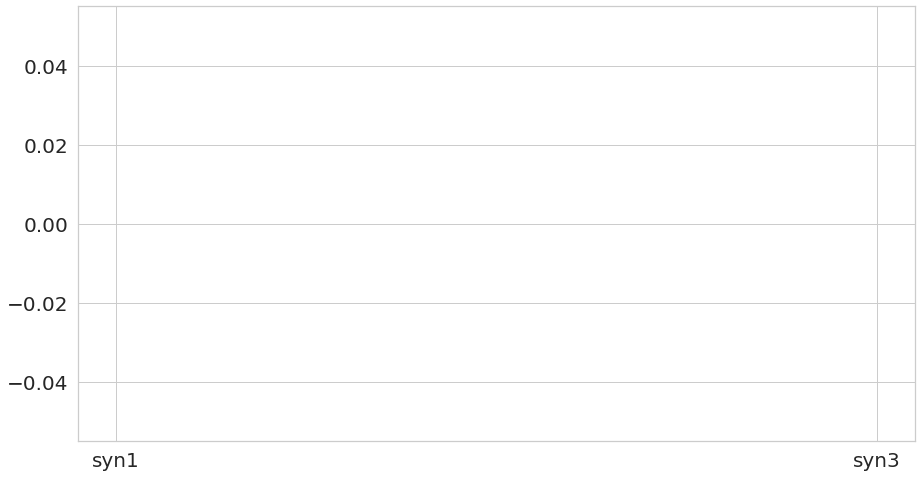

In [7]:
fig, ax = plt.subplots(figsize=(15,8))

g = sns.lineplot(data=df_top, x="dataset", y='f1_score',
    hue="explainer_name", palette=dict_color, marker="o", ax=ax, linewidth=2.8, markersize=8)

plt.title('Accuracy', fontsize=24, pad=20)
# Put the legend out of the figure
leg = g.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Explainer")
for i in range(11):
    leg.get_lines()[i].set_linewidth(6)
plt.subplots_adjust(hspace = 0.8)
plt.ylim(-0.05,1)
#plt.xlabel("dataset")
plt.ylabel("F1-score")
plt.show()